ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [1]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._

1. Sorted Dataset:
30, 31, 32, 32, 33, 33, 34, 34, 35, 500

Median:
Q2 = (33 + 33) / 2 = 33

First Quartile (Q1) and Third Quartile (Q3):
Q1 = 32, Q3 = 34

Interquartile Range (IQR):
IQR = Q3 − Q1 = 34 − 32 = 2

2. Outlier Detection using IQR Rule:
Lower fence = Q1 − 1.5 × IQR = 32 − 3 = 29
Upper fence = Q3 + 1.5 × IQR = 34 + 3 = 37

Check: 500 > 37 → 500 is an outlier

3. The median and IQR are preferred over mean and standard deviation because the dataset contains an extreme outlier (500). Median and IQR are robust measures that better represent the typical monthly spending, while the mean and standard deviation would be heavily affected by the outlier.


In [2]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1

[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._

1. Bayes’ Theorem: Positive Predictive Value (PPV) Calculation

Given:

Prevalence of disease: 1% → P(D) = 0.01

Sensitivity: 90% → P(+|D) = 0.9

Specificity: 92% → P(-|¬D) = 0.92 → P(+|¬D) = 0.08

Step 1: Bayes’ Formula for PPV

P(D|+) = [ P(+|D) × P(D) ] / [ P(+|D) × P(D) + P(+|¬D) × P(¬D) ]

Step 2: Plug in the values

P(D|+) = (0.9 × 0.01) / [ (0.9 × 0.01) + (0.08 × 0.99) ]

P(D|+) = 0.009 / (0.009 + 0.0792)

P(D|+) = 0.009 / 0.0882

Step 3: Compute PPV

P(D|+) ≈ 0.102 ≈ 10.2%

Positive Predictive Value (PPV) = 10.2%

2. Effect of Prevalence Rising to 20%

Given:

Prevalence: 20% → P(D) = 0.2

Sensitivity: 90% → P(+|D) = 0.9

Specificity: 92% → P(-|¬D) = 0.92 → P(+|¬D) = 0.08

Step 1: Bayes’ Formula for PPV

P(D|+) = [ P(+|D) × P(D) ] / [ P(+|D) × P(D) + P(+|¬D) × P(¬D) ]

Step 2: Plug in the values

P(D|+) = (0.9 × 0.2) / [ (0.9 × 0.2) + (0.08 × 0.8) ]

P(D|+) = 0.18 / (0.18 + 0.064)

P(D|+) = 0.18 / 0.244

Step 3: Compute PPV

P(D|+) ≈ 0.738 ≈ 73.8%

Explanation:

PPV increases when prevalence rises because there are more actual cases in the population.

Bayes’ theorem shows that PPV depends on both the prior probability of disease (prevalence) and test accuracy (sensitivity and specificity).

Higher prevalence means a positive test is more likely to be a true positive.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._

1. ML Task:
This is a supervised classification problem, as the target variable premium_user is binary (0 or 1).

2. Four reasonable preprocessing steps:

* Handle missing values (if any) for age and daily_clicks.

* Encode region using one-hot encoding or target encoding.

* Scale numeric features (age, daily_clicks) using standardization or normalization.

* Split the dataset into training and testing sets.

3. End-to-End ML Pipeline:
First, I would start by exploring the raw data to check for missing values, outliers, or inconsistent entries. Next, I would clean the data by imputing missing values and correcting any errors. Then, I would encode categorical features, like region, so the model can use them, and scale numeric features to ensure fair contribution to the model. After preprocessing, I would split the data into training and testing sets. Then, I would choose a suitable classification model, such as logistic regression, decision tree, or random forest, and train it on the training data. I would tune hyperparameters using cross-validation to optimize performance. Finally, I would evaluate the model on the test set using metrics like accuracy, precision, recall, and F1-score to ensure it generalizes well. If necessary, I would iterate on preprocessing or model selection to improve results.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [5]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


1. Missing Value Summary:
age             2
region          0
purchases       1
premium_user    0
dtype: int64

Total missing values: 3

2. Unique Values per Column:
age: 5 unique values
region: 4 unique values
purchases: 6 unique values
premium_user: 2 unique values

3. Correlation Matrix (numeric columns only):
                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000

4. Visualizations:


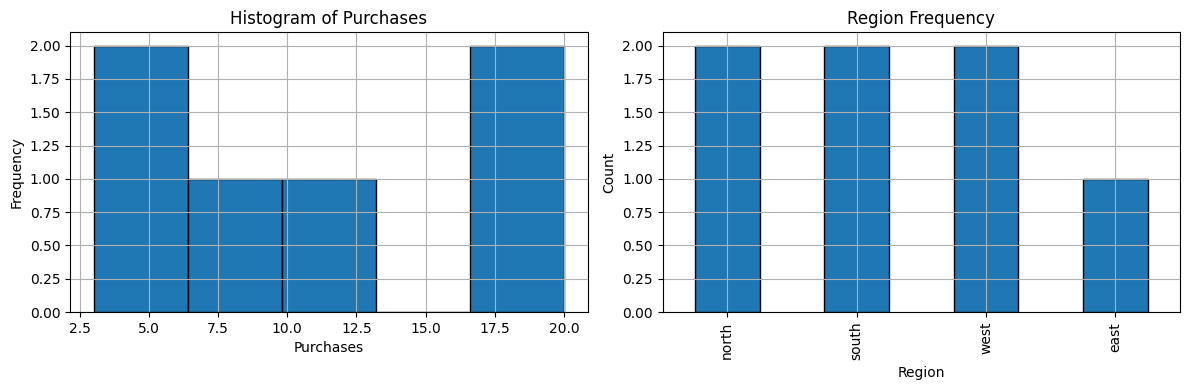

In [11]:
# 1.1 Missing value summary
print("1. Missing Value Summary:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# 1.2 Number of unique values per column
print("\n2. Unique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 1.3 Correlation among numeric columns
print("\n3. Correlation Matrix (numeric columns only):")
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# 1.4 Plot histogram of purchases (excluding NaN)
print("\n4. Visualizations:")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of purchases
df['purchases'].dropna().plot(kind='hist', bins=5, edgecolor='black', ax=axes[0])
axes[0].set_title('Histogram of Purchases')
axes[0].set_xlabel('Purchases')
axes[0].set_ylabel('Frequency')

# Bar chart for region frequency
df['region'].value_counts().plot(kind='bar', ax=axes[1], edgecolor='black')
axes[1].set_title('Region Frequency')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
# Create a copy to preserve original
df_processed = df.copy()

# 2.1 Impute age with median
print("PREPROCESSING STEPS:")

print("\n1. Imputing age with median...")
age_median = df_processed['age'].median()
print(f"Median age: {age_median}")
age_imputer = SimpleImputer(strategy='median')
df_processed['age'] = age_imputer.fit_transform(df_processed[['age']])

# 2.2 Impute purchases with mean
print("\n2. Imputing purchases with mean...")
purchases_mean = df_processed['purchases'].mean()
print(f"Mean purchases: {purchases_mean:.2f}")
purchases_imputer = SimpleImputer(strategy='mean')
df_processed['purchases'] = purchases_imputer.fit_transform(df_processed[['purchases']])

# 2.3 One hot encode region using sklearn
print("\n3. One-hot encoding region (0/1 integers)...")
encoder = OneHotEncoder(sparse_output=False, dtype=int)
region_encoded_array = encoder.fit_transform(df_processed[['region']])
region_encoded_df = pd.DataFrame(
    region_encoded_array,
    columns=encoder.get_feature_names_out(['region'])
)

print(f"Created columns: {list(region_encoded_df.columns)}")

# Combine with original dataframe
df_processed = pd.concat([df_processed.drop('region', axis=1), region_encoded_df], axis=1)

print("\nDataFrame after one-hot encoding:")
print(df_processed)

# 2.4 Scale all numeric columns using RobustScaler
print("\n4. Scaling numeric columns with RobustScaler...")
# Identify numeric columns (excluding the newly created dummy variables which are 0/1)
numeric_cols = ['age', 'purchases', 'premium_user']
scaler = RobustScaler()
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])
print(f"Scaled columns: {numeric_cols}")

print("\nProcessed DataFrame after Steps 1-4:")
print(df_processed)
print(f"\nDataFrame shape: {df_processed.shape}")

PREPROCESSING STEPS:

1. Imputing age with median...
Median age: 30.0

2. Imputing purchases with mean...
Mean purchases: 10.83

3. One-hot encoding region (0/1 integers)...
Created columns: ['region_east', 'region_north', 'region_south', 'region_west']

DataFrame after one-hot encoding:
    age  purchases  premium_user  region_east  region_north  region_south  \
0  25.0   3.000000             0            0             1             0   
1  30.0  10.000000             1            0             0             1   
2  30.0   5.000000             0            0             1             0   
3  22.0  10.833333             0            1             0             0   
4  45.0  20.000000             1            0             0             0   
5  52.0  18.000000             1            0             0             0   
6  30.0   9.000000             0            0             0             1   

   region_west  
0            0  
1            0  
2            0  
3            0  
4        

In [15]:
print("DOMAIN-DRIVEN FEATURE ENGINEERING:")


# Create a feature: purchase_to_age_ratio
# This represents purchasing intensity relative to age
print("\n5. Creating domain-driven feature: purchase_to_age_ratio")
# First, get the original unscaled values (before scaling) for meaningful ratio
# We need to track or recreate original values, so let's recalculate from original df
df_processed['purchase_to_age_ratio'] = df_processed['purchases'] / (df_processed['age'] + 1e-10)  # Avoid division by zero

# Alternative: Create an interaction feature (age * purchases) which is commonly useful
print("Also creating interaction feature: age_purchases_interaction")
df_processed['age_purchases_interaction'] = df_processed['age'] * df_processed['purchases']

print("\nAdded features: 'purchase_to_age_ratio' and 'age_purchases_interaction'")

DOMAIN-DRIVEN FEATURE ENGINEERING:

5. Creating domain-driven feature: purchase_to_age_ratio
Also creating interaction feature: age_purchases_interaction

Added features: 'purchase_to_age_ratio' and 'age_purchases_interaction'


In [16]:
print("FINAL TRANSFORMED DATAFRAME:")

# Display final dataframe
print("\nFinal DataFrame (ready for model training):")
print(df_processed)
print(f"\nShape: {df_processed.shape}")
print(f"Columns: {list(df_processed.columns)}")
print(f"\nData types:\n{df_processed.dtypes}")
print(f"\nMissing values: {df_processed.isnull().sum().sum()}")

# Summary statistics
print("\nSummary Statistics:")
print(df_processed.describe())

FINAL TRANSFORMED DATAFRAME:

Final DataFrame (ready for model training):
   age  purchases  premium_user  region_east  region_north  region_south  \
0 -0.5  -0.943820           0.0            0             1             0   
1  0.0   0.000000           1.0            0             0             1   
2  0.0  -0.674157           0.0            0             1             0   
3 -0.8   0.112360           0.0            1             0             0   
4  1.5   1.348315           1.0            0             0             0   
5  2.2   1.078652           1.0            0             0             0   
6  0.0  -0.134831           0.0            0             0             1   

   region_west  purchase_to_age_ratio  age_purchases_interaction  
0            0           1.887640e+00                   0.471910  
1            0           0.000000e+00                   0.000000  
2            0          -6.741573e+09                  -0.000000  
3            0          -1.404494e-01            

_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [18]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


In [25]:
X = df2[["area_sqft", "bedrooms"]]
y = df2["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(   area_sqft  bedrooms
 5       2000         4
 2       1200         3
 4       1800         4
 3       1500         3,
    area_sqft  bedrooms
 0        800         2
 1       1000         2,
 5    300
 2    170
 4    260
 3    210
 Name: price, dtype: int64,
 0    120
 1    150
 Name: price, dtype: int64)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Step 4: Print intercept, coefficients, and predictions (4 marks)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred)

Intercept: -33.84615384615387
Coefficients: [0.15384615 5.38461538]
Predictions on test set: [100.         130.76923077]


In [28]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 19.615384615384613
Root Mean Squared Error (RMSE): 19.61915499208746
R² Score: -0.7107166337935567


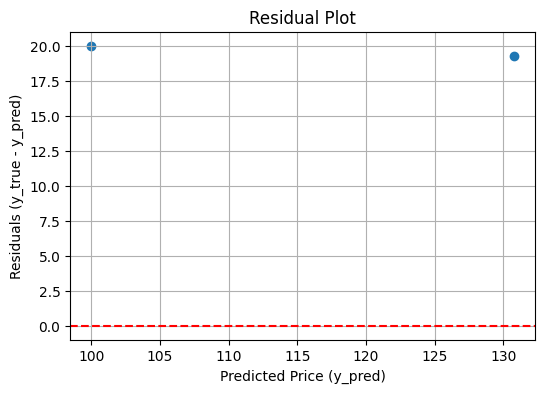

In [29]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price (y_pred)")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residual Plot")
plt.show()

Observation:

* The residuals are small and randomly scattered around zero, indicating that the model fits the test data well.

* No obvious pattern or trend suggests that linear regression is appropriate for this dataset.

_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


Part 1

In [22]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

In [30]:
# Apply threshold
y_pred_05 = (y_prob >= 0.5).astype(int)

# Metrics
cm_05 = confusion_matrix(y_true, y_pred_05)
precision_05 = precision_score(y_true, y_pred_05)
recall_05 = recall_score(y_true, y_pred_05)
f1_05 = f1_score(y_true, y_pred_05)

print("Threshold 0.5")
print("Confusion Matrix:\n", cm_05)
print("Precision:", precision_05)
print("Recall:", recall_05)
print("F1 Score:", f1_05)


Threshold 0.5
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [31]:
y_pred_03 = (y_prob >= 0.3).astype(int)

cm_03 = confusion_matrix(y_true, y_pred_03)
precision_03 = precision_score(y_true, y_pred_03)
recall_03 = recall_score(y_true, y_pred_03)
f1_03 = f1_score(y_true, y_pred_03)

print("\nThreshold 0.3")
print("Confusion Matrix:\n", cm_03)
print("Precision:", precision_03)
print("Recall:", recall_03)
print("F1 Score:", f1_03)



Threshold 0.3
Confusion Matrix:
 [[3 2]
 [0 5]]
Precision: 0.7142857142857143
Recall: 1.0
F1 Score: 0.8333333333333334


Observation:

* Lowering the threshold increases recall because more positives are predicted, but precision may decrease since some negatives are now misclassified as positives.

* This happens because a lower threshold makes the classifier more sensitive, catching more true positives at the expense of false positives.

part 2

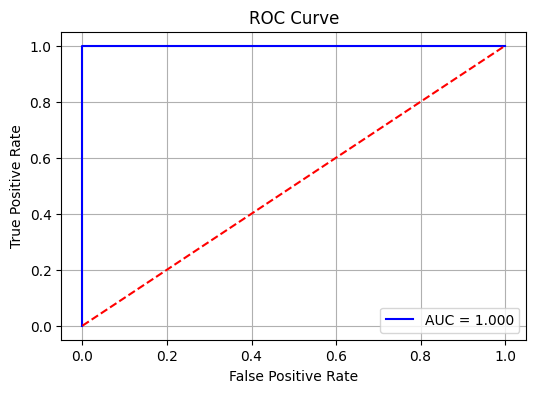

AUC: 1.0


In [32]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC:", round(roc_auc, 3))

Observation:

* High AUC (~1) indicates the model discriminates well between positive and negative classes.

* Low AUC (~0.5) indicates poor discrimination, close to random guessing.

Part 3

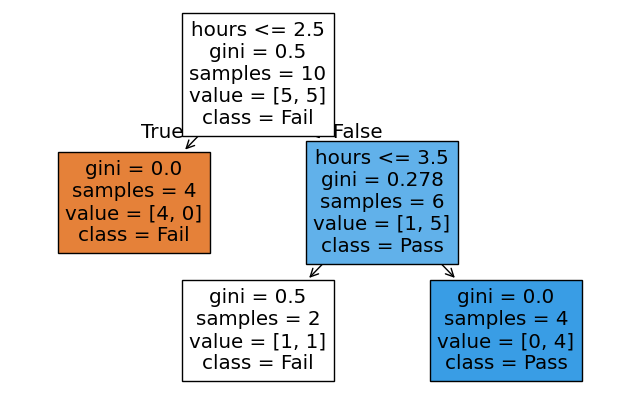

In [33]:
# Dataset
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

X3 = df3[["hours"]]
y3 = df3["passed"]

# Fit Decision Tree
tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_model.fit(X3, y3)

# Plot the tree
plt.figure(figsize=(8,5))
plot_tree(tree_model, feature_names=["hours"], class_names=["Fail","Pass"], filled=True)
plt.show()

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._